# Define the antenna pattern functions for LIGO and do the sky plot.
#### Zu-Cheng Chen, Feb 2019

In [14]:
# load packages
using PyPlot
# pygui(true) # enable a separate window plot
using LinearAlgebra

## Define the antenna function.

Direct product $\otimes$: for two vectors $a = [a_1, a_2, a_3]$, $b = [b_1, b_2, b_3]$, it return a matrix
$$ 
a \otimes b =  a * b'
$$

In [2]:
"""
Direct product of two vectors a and b.
"""
⊗(a::Array, b::Array) = a * b';

# test this function
# a = [1, 2, 3]
# b = [4, 5, 6]
# ⊗(a, b)

$$
\hat{e}_+ = \hat{x} \otimes \hat{x} - \hat{y} \otimes \hat{y}
$$

In [3]:
"""
e₊(̂x, ̂y) tensor
"""
e₊(x::Array, y::Array) = ⊗(x, x) - ⊗(y, y);

# test this function
# x = [1, 2, 3]
# y = [4, 5, 6]
# e₊(x, y)

$$
\hat{e}_\times = \hat{x} \otimes \hat{y} + \hat{y} \otimes \hat{x}
$$

In [4]:
"""
eₓ(̂x, ̂y) tensor
"""
eₓ(x::Array, y::Array) = ⊗(x, y) + ⊗(y, x);

# test this function
# x = [1, 2, 3]
# y = [4, 5, 6]
# eₓ(x, y)

$$ 
\overleftrightarrow{D} = \frac{1}{2} (\hat{n}_X \otimes \hat{n}_X - \hat{n}_Y \otimes \hat{n}_Y)
$$

In [15]:
"""
Detector tensor: DTensor
"""
DTensor(x::Array, y::Array) = 1/2 * (⊗(x, x) - ⊗(y, y));

# test this function
# x = [1, 2, 3]
# y = [4, 5, 6]
# DTensor(x, y)

In [16]:
# basis vectors

# detector frame
unit_X = [1, 0, 0];
unit_Y = [0, 1, 0];
unit_Z = [0, 0, 1];

# source frame
# z is the opposite direction of r
unit_z(θ::Real, ϕ::Real) = - [sin(θ) * cos(ϕ), sin(θ) * sin(ϕ), cos(θ)]

"""
The basis vector along x-axis.
Note if θ == 0, then it goes along Y-axis.
"""
function unit_x(θ::Real, ϕ::Real)
    if θ == 0
        return [0, 1, 0]
    end
    X = cross(unit_z(θ, ϕ), unit_Z)
    X/norm(X)
end
# test this function
# unit_x(π/2, 0)

unit_y(θ::Real, ϕ::Real) = cross(unit_z(θ, ϕ), unit_x(θ, ϕ));
# test this function
# unit_y(π/2, 0), norm(unit_y(π/2, 0))

In [17]:
"""
rotation matrix
"""
rot_mat(α::Real) = [cos(α) -sin(α) 0;
                    sin(α) cos(α)  0;
                    0      0       1];

# test this function
# rotate the x-axis to y-axis
# x = [1, 0, 0]
# rot_mat(π/2) * x 

In [18]:
"""
rotate the vector v around z-axis for α angle
"""
rot(v::Array, α::Real) = rot_mat(α) * v;
# test this function
# rotate the x-axis to y-axis
# x = [1, 0, 0]
# rot(x, π/2) 

Antenna pattern function for LIGO
$$
F_+ = \hat{e}_+ : \overleftrightarrow{D}
$$

In [21]:
function F₊(θ::Real, ϕ::Real, α=0) 
    x = unit_x(θ, ϕ)
    y = unit_y(θ, ϕ)
    
    # do the rotation
    x = rot(x, α)
    y = rot(y, α)
    
    e_tensor = e₊(x, y)
    D_tensor = DTensor(unit_X, unit_Y)
    
    dot(e_tensor, D_tensor)
end

# test this function
# F₊(-0.001, 0, 0)

Antenna pattern function for LIGO
$$
F_+ = \hat{e}_+ : \overleftrightarrow{D}
$$

In [24]:
function Fₓ(θ::Real, ϕ::Real, α=0) 
    x = unit_x(θ, ϕ)
    y = unit_y(θ, ϕ)
    
    # do the rotation
    x = rot(x, α)
    y = rot(y, α)
    
    e_tensor = eₓ(x, y)
    D_tensor = DTensor(unit_X, unit_Y)
    
    dot(e_tensor, D_tensor)
end

# test this function
# Fₓ(0, 0, 0)

Fₓ (generic function with 2 methods)

## Skyplot

In [11]:
θs = 0:0.005:π;
ϕs = 0:0.005:(2π);

grid_θ = [θ for θ in θs, ϕ in ϕs];
grid_ϕ = [ϕ for θ in θs, ϕ in ϕs];

grid_X = sin.(grid_θ) .* cos.(grid_ϕ);
grid_Y = sin.(grid_θ) .* sin.(grid_ϕ);
grid_Z = cos.(grid_θ);

grid_F₊ = abs.(F₊.(grid_θ, grid_ϕ, 0));
grid_Fₓ = abs.(Fₓ.(grid_θ, grid_ϕ, 0));

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[13]:10
└ @ Core In[13]:10
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[13]:19
└ @ Core In[13]:19


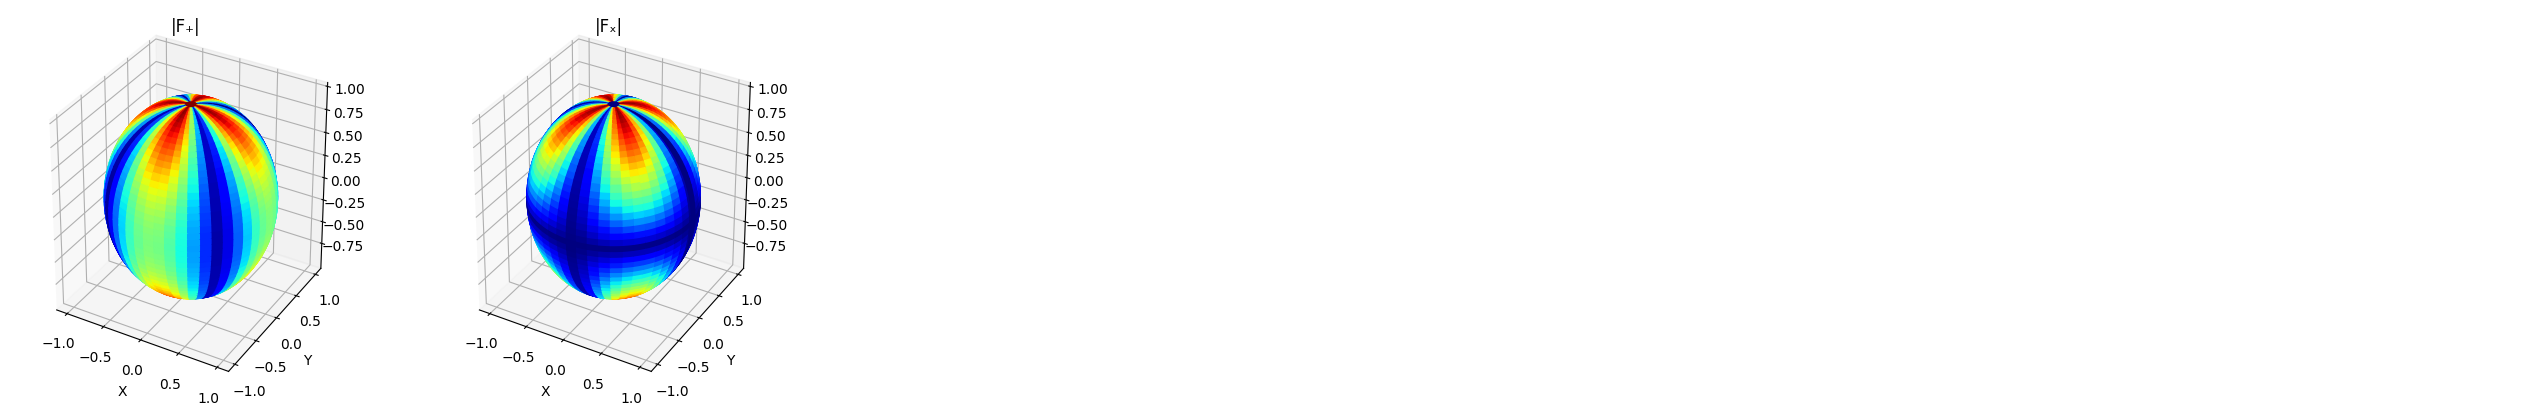

In [13]:
using3D()

fig = figure(figsize=(10, 5))

# plot F₊
ax = fig[:add_subplot](1,2,1, projection = "3d");
xlabel("X")
ylabel("Y")
title("|F₊|")
ax[:plot_surface](grid_X, grid_Y, grid_Z, 
    facecolors=get_cmap("jet").o(grid_F₊),
    cmap="coolwarm")

# plot Fₓ
ax = fig[:add_subplot](1, 2, 2, projection="3d")
xlabel("X")
ylabel("Y")
title("|Fₓ|")
ax[:plot_surface](grid_X, grid_Y, grid_Z, 
    facecolors=get_cmap("jet").o(grid_Fₓ), 
    cmap="coolwarm");